# Individual Assignment 2: Evaluating Linear Models

-----------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------

**Your Name Here: Rohit Akole**

**Net ID: rva23001**

Let's put all of your skills to work on a basic regression modeling notebook!



[Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, mount your Drive, then read the dataframe as `df`. Then...


10 pts each.
* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Count how many rows have missing values, then drop any rows with missing values.
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Town` column.
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

Please use nice subheaders/titles so that your code is easy to grade.



In [1]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK.

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 40.2MB/s]


In [2]:
# Importing all the necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the dataset and storing it in pandas dataframe
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')
df.head()

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family


In [4]:
# Looking at the metadata and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145987 entries, 0 to 145986
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               145987 non-null  int64  
 1   SerialNumber     145987 non-null  int64  
 2   ListYear         145987 non-null  int64  
 3   DateRecorded     145981 non-null  object 
 4   Town             145987 non-null  object 
 5   Address          145985 non-null  object 
 6   AssessedValue    145987 non-null  int64  
 7   SaleAmount       140704 non-null  float64
 8   SalesRatio       145987 non-null  float64
 9   PropertyType     145987 non-null  object 
 10  ResidentialType  134082 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 12.3+ MB


### Question 1
Drop any rows where the AssessedValue is greater than 1 million USD

In [5]:
# Saving dataframe in df where AssessedValue is less than or equal to 1000000
df = df[df['AssessedValue'] <= 1000000]
df.head()

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family


In [6]:
# Dataframe was reduced by 4807 rows
# Original number of rows: 145987
# After looking at only Assessed Values less than or equal to 1M: 141180
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141180 entries, 0 to 145986
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               141180 non-null  int64  
 1   SerialNumber     141180 non-null  int64  
 2   ListYear         141180 non-null  int64  
 3   DateRecorded     141175 non-null  object 
 4   Town             141180 non-null  object 
 5   Address          141178 non-null  object 
 6   AssessedValue    141180 non-null  int64  
 7   SaleAmount       136158 non-null  float64
 8   SalesRatio       141180 non-null  float64
 9   PropertyType     141180 non-null  object 
 10  ResidentialType  131178 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 12.9+ MB


### Question 2
Count how many rows have missing values, then drop any rows with missing values.


In [7]:
# Looking at the number of nulls/missing values in the dataframe
missing_rows = df.isnull().sum()
# Printing all the columns with missing rows count
print('Columns with unmber of missing values:')
print(missing_rows)

Columns with unmber of missing values:
ID                     0
SerialNumber           0
ListYear               0
DateRecorded           5
Town                   0
Address                2
AssessedValue          0
SaleAmount          5022
SalesRatio             0
PropertyType           0
ResidentialType    10002
dtype: int64


In [8]:
# Dropping Rows with Null/Missing Values
df = df.dropna()
# Dataset was reduced by additional 14125 rows
# Original number of rows: 145987
# After dropping Null: 127055 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB


In [9]:
# Rechecking the null/missing values in the dataframe
missing_rows = df.isnull().sum()
# Printing all the columns with missing rows count
print('Columns with unmber of missing values:')
print(missing_rows)

Columns with unmber of missing values:
ID                 0
SerialNumber       0
ListYear           0
DateRecorded       0
Town               0
Address            0
AssessedValue      0
SaleAmount         0
SalesRatio         0
PropertyType       0
ResidentialType    0
dtype: int64


### Question 3
Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.


In [10]:
# Head of the dataframe
df.head()

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family
5,6,15051,2015,9/28/2016,Andover,107 LAKESIDE DR,188400,226000.0,0.833628,Residential,Single Family


In [11]:
# Looking at the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB


In [12]:
# As the Assessed Value is a currency, I would prefer to look at it as float instead of int
df['AssessedValue'] = df['AssessedValue'].astype(float)
# Changing the Datatype of DateRecorded to DateTime
df['DateRecorded'] = pd.to_datetime(df['DateRecorded'])

In [13]:
# Confirming the changes in Dataframe schema
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               127055 non-null  int64         
 1   SerialNumber     127055 non-null  int64         
 2   ListYear         127055 non-null  int64         
 3   DateRecorded     127055 non-null  datetime64[ns]
 4   Town             127055 non-null  object        
 5   Address          127055 non-null  object        
 6   AssessedValue    127055 non-null  float64       
 7   SaleAmount       127055 non-null  float64       
 8   SalesRatio       127055 non-null  float64       
 9   PropertyType     127055 non-null  object        
 10  ResidentialType  127055 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 11.6+ MB


In [14]:
df.head()

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
1,2,14011,2014,2015-01-14,Andover,1 JUROVATY LANE,153100.0,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,2015-11-30,Andover,1 ROSE LANE,102900.0,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,2015-09-28,Andover,10 PINE RIDGE DR,108700.0,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,2015-08-10,Andover,101 WALES RD,164000.0,230000.0,0.713043,Residential,Single Family
5,6,15051,2015,2016-09-28,Andover,107 LAKESIDE DR,188400.0,226000.0,0.833628,Residential,Single Family


### Question 4
Count how many unique values are in the Town column.

In [15]:
# Counting Unique Values in Towns Column
unique_towns = df['Town'].nunique()
# Printing the number of unique towns
print(f"Unique values in the Town column: {unique_towns}")

Unique values in the Town column: 169


### Question 5
Make a new dataframe called tmp of dummy variables for each value in the Town column. (hint: this dataframe should have 127055 rows and 169 columns, one column for each town).

In [16]:
# Creating new dataframe called tmp for dummy variables for each value in town column
tmp = pd.get_dummies(df['Town'])
# Printing the shape to make sure the output is correct
print(f"Shape of the dataframe of dummy variables: {tmp.shape}")

Shape of the dataframe of dummy variables: (127055, 169)


### Question 6
Make a new dataframe called X that subsets the AssessedValue and ListYear from df, and concatenate with your dataframe called tmp. Hint: This dataframe should have 171 columns.

In [17]:
# Creating a subset of AssessedValue and ListTear from df and concatinating with tmp dataframe. Called it X
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)
X

,AssessedValue,ListYear,Andover,Ansonia,Ashford,Avon,Barkhamsted,Beacon Falls,Berlin,Bethany,...,Willington,Wilton,Winchester,Windham,Windsor,Windsor Locks,Wolcott,Woodbridge,Woodbury,Woodstock
1,153100.0,2014,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,102900.0,2015,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,108700.0,2014,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,164000.0,2014,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,188400.0,2015,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145937,105900.0,2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
145938,0.0,2014,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
145939,0.0,2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
145940,222860.0,2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Question 7
Subset SaleAmount from df and assign to a variable called y.

In [18]:
#Creating a subset of SaleAmount as y
y = df['SaleAmount']
y

1         190000.0
2          50000.0
3         128368.0
4         230000.0
5         226000.0
            ...   
145937     50107.0
145938     15000.0
145939      8000.0
145940    278701.0
145941    320000.0
Name: SaleAmount, Length: 127055, dtype: float64

### Question 8
Convert X and y to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.

In [19]:
# Converting X and y to numpy Arrays and splitting the data 80/20 into traning and testing with my student ID as random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3133252)

### Question 9
Fit a linear regression model. Calculate mean absolute error for each partition.

In [20]:
# Fitting a linear regression Model using sklearn library
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on training and testing datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating Mean Absolute Error for training and testing datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Printing Mean Absolute Error values for training and testing datasets
print("Mean Absolute Error of Training Dataset:", mae_train)
print("Mean Absolute Error of Testing Dataset:", mae_test)

Mean Absolute Error of Training Dataset: 91344.91270186109
Mean Absolute Error of Testing Dataset: 95095.91133684281


### Question 10
Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

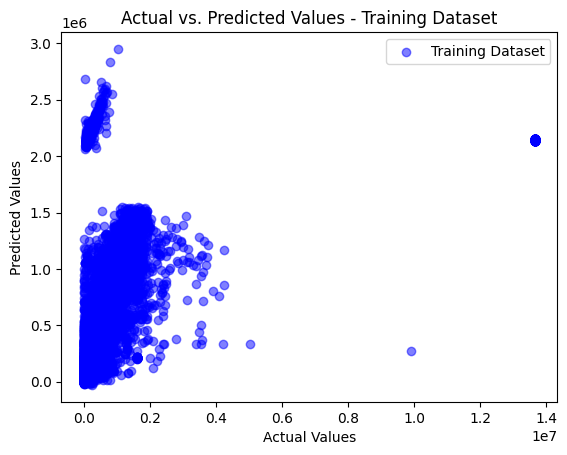

In [21]:
# Scatter Plot for training Dataset
plt.scatter(y_train, y_train_pred, color='blue', label='Training Dataset', marker='o', alpha = 0.5)
#Labeling x-axis and y-axis
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Providing title for the plot
plt.title('Actual vs. Predicted Values - Training Dataset')
# Enabled legend
plt.legend()
plt.show()

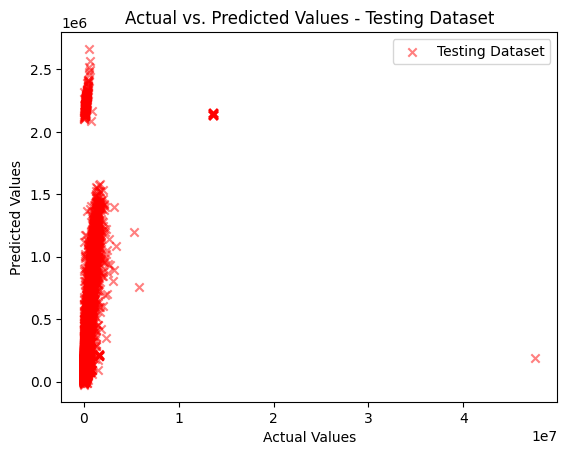

In [22]:
# Scatter Plot for Testing Dataset
plt.scatter(y_test, y_test_pred, color='red', label='Testing Dataset', marker='x', alpha=0.5)
#Labeling x-axis and y-axis
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Providing title for the plot
plt.title('Actual vs. Predicted Values - Testing Dataset')
# Enabled legend
plt.legend()
plt.show()

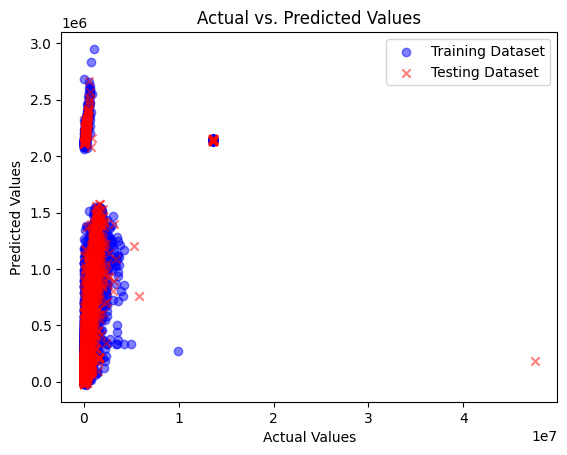

In [23]:
# Plotting the overlaping plot of Training and Validation Dataset to get better picture
fig, ax = plt.subplots()
# Scatter plot for Training Set with O being Training Datapoints
ax.scatter(y_train, y_train_pred, color='blue', label='Training Dataset', marker='o', alpha = 0.5)
# Scatter plot for Validation Set with X being Testing Datapoints
ax.scatter(y_test, y_test_pred, color='red', label='Testing Dataset', marker='x', alpha=0.5)
# Providing title for the plot
ax.set_title('Actual vs. Predicted Values')
#Labeling x-axis and y-axis
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
# Enabled legend
ax.legend()
plt.show()